In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [2]:
#Cargar dataset
df = pd.read_excel("dataset.xlsx")
tyres = df.loc[df['Familia'] == 'LLANTA']

In [3]:
tyres['Fecha'].min(), tyres['Fecha'].max()
        

(Timestamp('2016-09-01 00:00:00'), Timestamp('2020-03-10 00:00:00'))

In [4]:
cols = ['IdCliente', 'NombreCliente', 'Empleado', 'Referencia', 'Descripcion', 'CodigoFamilia',
        'Familia', 'Cantidad', 'Localidad','Sede', 'Area', 'Rentabilidad']

tyres.isnull().sum()

IdCliente        0
NombreCliente    0
Fecha            0
Empleado         0
Referencia       0
Descripcion      0
CodigoFamilia    0
Familia          0
Cantidad         0
Ventas           0
Localidad        0
Sede             0
Area             0
Rentabilidad     0
dtype: int64

In [5]:

#furniture.drop(cols, axis=1, inplace=True)
#furniture = furniture.sort_values('Fecha')
furniture.isnull().sum()


IdCliente        0
NombreCliente    0
Fecha            0
Empleado         0
Referencia       0
Descripcion      0
CodigoFamilia    0
Familia          0
Cantidad         0
Ventas           0
Localidad        0
Sede             0
Area             0
Rentabilidad     0
dtype: int64

In [6]:

furniture.head()

,IdCliente,NombreCliente,Fecha,Empleado,Referencia,Descripcion,CodigoFamilia,Familia,Cantidad,Ventas,Localidad,Sede,Area,Rentabilidad
0,C1070956433,PINTO JOHN,2016-09-01,24.0,LL-2R-0038,PILOT STREET 110/80-17,101.0,LLANTA,1.0,129310.0,Puente aranda,Calle 13,35.0,32.868
1,C1032372566,CESAR CRUZ,2016-09-01,14.0,LL-TCA-0133,TOURING 175/70R13,101.0,LLANTA,2.0,181034.0,Suba,Suba,32.0,10.576
2,C2865810,PINEDA JAIME,2016-09-01,12.0,LL-TCA-0019,ENERGY XM2 185/65R14,101.0,LLANTA,1.0,193095.0,Usaquen,Santa ana,33.0,51.594
3,C11210285,VILLALBA RODRIGUEZ FABIO,2016-09-01,24.0,LL-TCA-0009,ENERGY XM2 165/65R13,101.0,LLANTA,2.0,262069.0,Puente aranda,Calle 13,35.0,62.337
4,C80755314,MOLINA RONALD,2016-09-01,14.0,LL-TCA-0132,NO UTILIZAR,101.0,LLANTA,4.0,362069.0,Suba,Suba,32.0,29.589


In [7]:
#agrupar
furniture = furniture.groupby('Fecha')['Ventas'].sum().reset_index()

In [8]:
furniture = furniture.set_index('Fecha')
furniture.index

DatetimeIndex(['2016-09-01', '2016-09-02', '2016-09-03', '2016-09-04',
               '2016-09-05', '2016-09-06', '2016-09-07', '2016-09-08',
               '2016-09-09', '2016-09-10',
               ...
               '2020-02-28', '2020-02-29', '2020-03-02', '2020-03-03',
               '2020-03-04', '2020-03-05', '2020-03-06', '2020-03-07',
               '2020-03-09', '2020-03-10'],
              dtype='datetime64[ns]', name='Fecha', length=1064, freq=None)

In [9]:
y = furniture['Ventas'].resample('MS').mean()

In [10]:
y.head(2018)

Fecha
2016-09-01    3.265096e+07
2016-10-01    3.271461e+07
2016-11-01    5.399029e+07
2016-12-01    6.193133e+07
2017-01-01    4.889400e+07
2017-02-01    5.341497e+07
2017-03-01    5.150715e+07
2017-04-01    6.324323e+07
2017-05-01    4.946778e+07
2017-06-01    5.691991e+07
2017-07-01    4.804865e+07
2017-08-01    5.335903e+07
2017-09-01    5.364287e+07
2017-10-01    5.144495e+07
2017-11-01    6.236671e+07
2017-12-01    7.135734e+07
2018-01-01    5.540689e+07
2018-02-01    4.746763e+07
2018-03-01    5.278339e+07
2018-04-01    5.191430e+07
2018-05-01    5.437419e+07
2018-06-01    4.310119e+07
2018-07-01    5.037988e+07
2018-08-01    4.904950e+07
2018-09-01    4.911920e+07
2018-10-01    4.965763e+07
2018-11-01    6.520295e+07
2018-12-01    5.900896e+07
2019-01-01    5.264070e+07
2019-02-01    5.297562e+07
2019-03-01    4.685759e+07
2019-04-01    5.147110e+07
2019-05-01    4.502967e+07
2019-06-01    4.804559e+07
2019-07-01    5.954232e+07
2019-08-01    4.262638e+07
2019-09-01    4.918840

In [11]:
# from sklearn.preprocessing import MinMaxScaler
 #sc_in = MinMaxScaler ( feature_range = (0, 1) ) 
# scaled_input = sc_in.fit_transform (furniture [['Ventas']])
 #scaled_input = pd.DataFrame (scaled_input) 
 #y['Ventas']= scaled_input
 #y['Ventas'].head()

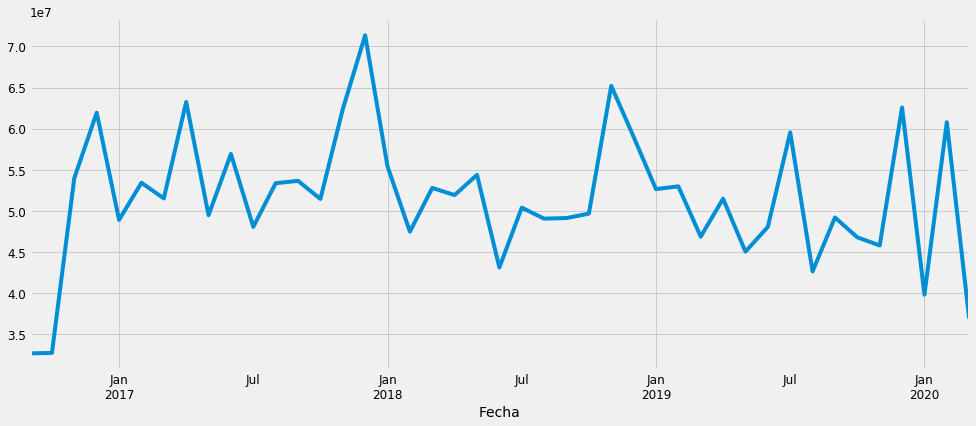

In [12]:
#vISUALIZAR DATOS
y.plot (figsize = (15, 6)) 
plt.show ()

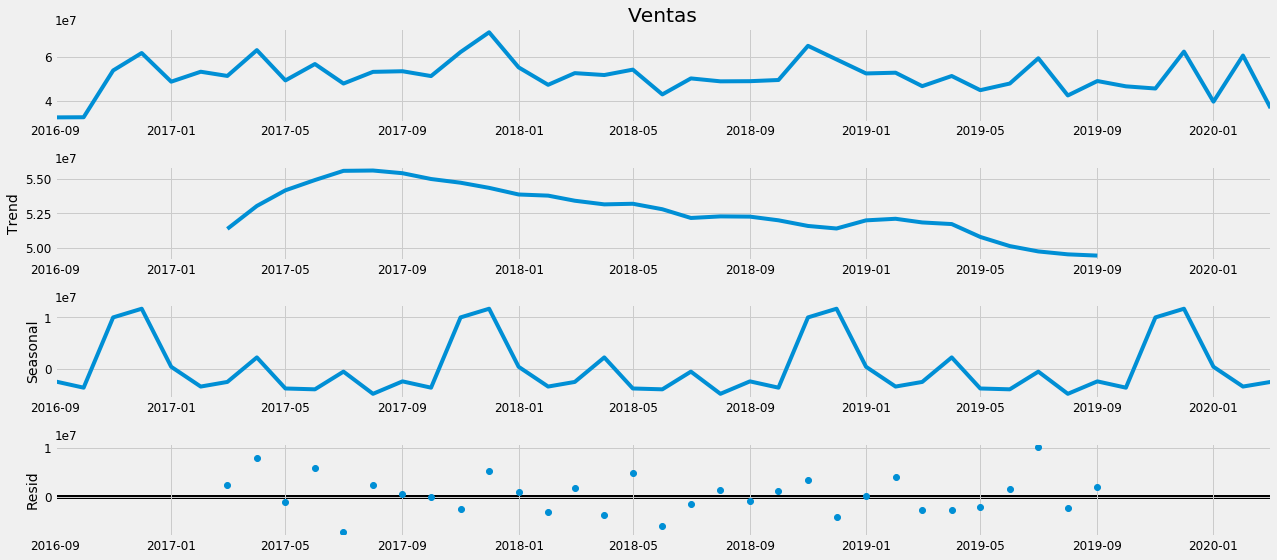

In [13]:
#estacional tendencia
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [39]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [40]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1614.3536966410768
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:33437517897.671898
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1045.059410688756
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:626.9741450272295
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1085.2845548850985
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1047.0892339529928
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:661.1133009102945
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:628.394914115044
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1551.3544794491036
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:32367240539.2068
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1007.5666598314704

C:\Users\mrojas\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)



ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:593.2325371397959
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1166.1413423010013
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1093.0692692514606
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:662.2598649495285
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:593.3522103752955
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1445.2407446456946


C:\Users\mrojas\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1199781432.7927835
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:1033.7393522806124
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:605.7394146101079
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:1058.6334927724492
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1199700865.4160252
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:642.3130295337843
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:607.6257447455253
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:1392.8915135436152
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:747126514.4074111
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:983.5340238711627
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:563.7173920287876

C:\Users\mrojas\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)



ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:1039.0345365643934
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:747045972.9098577
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:631.8949143892835
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:565.715120193898
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:1481.008125410457
ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:1196827748.006866
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:1046.450388599846
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:627.083302242471
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:1049.7975291377988
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:1051.30599731453
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:628.4429569868981
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:627.509635581131
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:1435.2717928483346
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:1196761851.2049499
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:1007.8005266897898
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:594.257081294659
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:1041.1771022081912
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:1003.951894396188
ARIMA(1,

In [44]:
# sa (1, 1, 1)x(0, 1, 1, 12)
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4902      0.427     -1.147      0.251      -1.328       0.348
ma.L1         -0.7783      0.332     -2.347      0.019      -1.428      -0.128
ar.S.L12       0.0707      3.485      0.020      0.984      -6.760       6.902
ma.S.L12      -0.0371      3.259     -0.011      0.991      -6.424       6.350
sigma2      6.731e+13   3.68e-13   1.83e+26      0.000    6.73e+13    6.73e+13


In [52]:
results.plot_diagnostics (figsize = (16, 8), color=red) 
plt.show ()

NameError: name 'red' is not defined

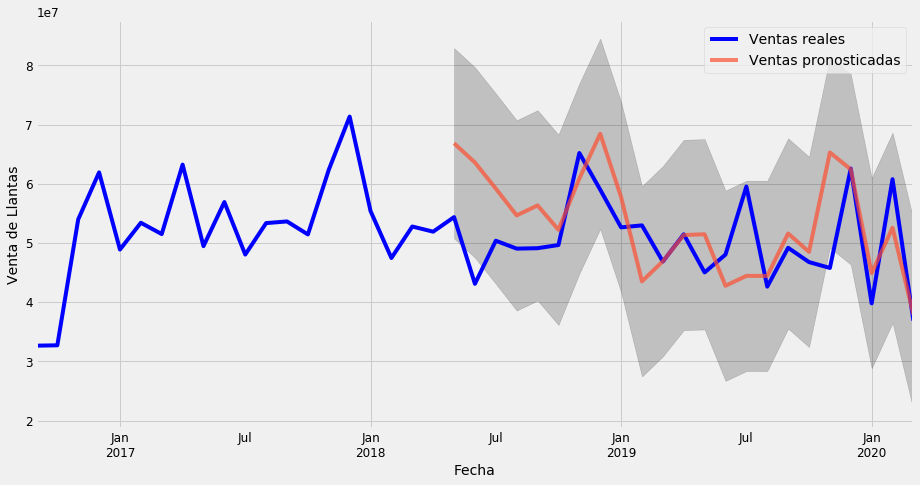

In [105]:
pred = results.get_prediction(start=pd.to_datetime('2018-05-01'), dynamic=False)
pred_ci = pred.conf_int()

ax = y['2016':].plot(label='Ventas reales', COLOR='B')
pred.predicted_mean.plot(ax=ax, label='Ventas pronosticadas', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Fecha')
ax.set_ylabel('Venta de Llantas')
plt.legend()

plt.show()

In [106]:
y_forecasted = pred.predicted_mean
y_truth = y['2017-09-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 76175397833683.23


In [107]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 8727851.85


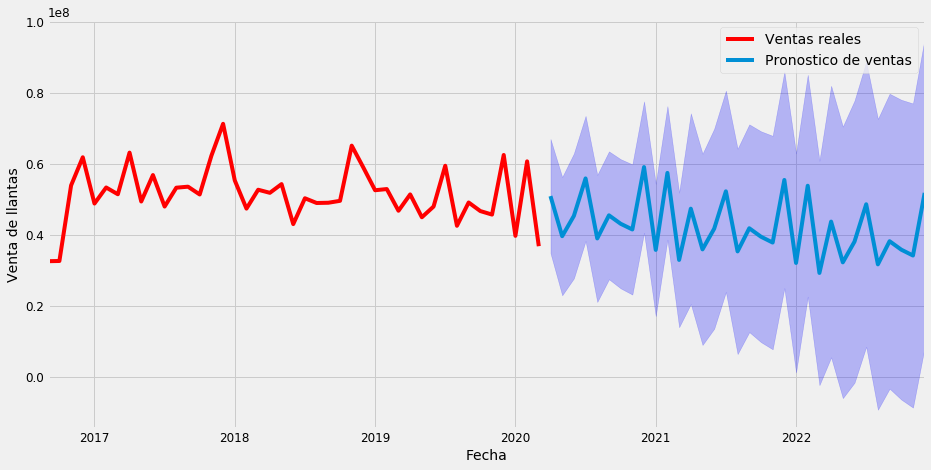

In [89]:
pred_uc = results.get_forecast(steps=33)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='Ventas reales', figsize=(14, 7), color ='R')
pred_uc.predicted_mean.plot(ax=ax, label='Pronostico de ventas')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='B', alpha=.25)
ax.set_xlabel('Fecha')
ax.set_ylabel('Venta de llantas')
plt.legend()
plt.show()